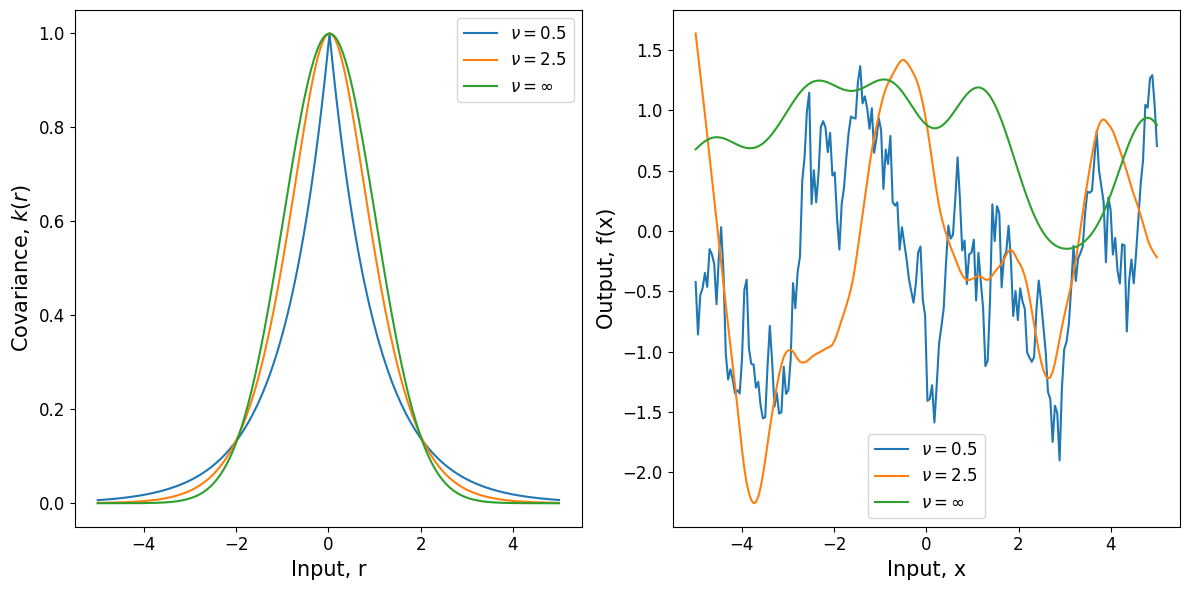

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import multivariate_normal

# Input range
x = np.linspace(-5, 5, 200)

# Compute the covariance matrices for different nu values
matern_0_5 = Matern(length_scale=1.0, nu=0.5)
matern_2_5 = Matern(length_scale=1.0, nu=2.5)
matern_inf = Matern(length_scale=1.0, nu=np.inf)


X = x[:, np.newaxis]
K_0_5 = matern_0_5(X, X)
K_2_5 = matern_2_5(X, X)
K_inf = matern_inf(X, X)

# Tomar una f por kernel
np.random.seed(42)
f_0_5 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_0_5)
f_2_5 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_2_5)
f_inf = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_inf)

# Plot funciones de covarianza
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, K_0_5[len(x)//2], label=r'$\nu=0.5$')
plt.plot(x, K_2_5[len(x)//2], label=r'$\nu=2.5$')
plt.plot(x, K_inf[len(x)//2], label=r'$\nu=\infty$')
plt.xlabel('Input, r', fontsize=15)
plt.ylabel('Covariance, $k(r)$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Se muestra un ejemplo por valor de v
plt.subplot(1, 2, 2)
plt.plot(x, f_0_5, label=r'$\nu=0.5$')
plt.plot(x, f_2_5, label=r'$\nu=2.5$')
plt.plot(x, f_inf, label=r'$\nu=\infty$')
plt.xlabel('Input, x', fontsize=15)
plt.ylabel('Output, f(x)', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


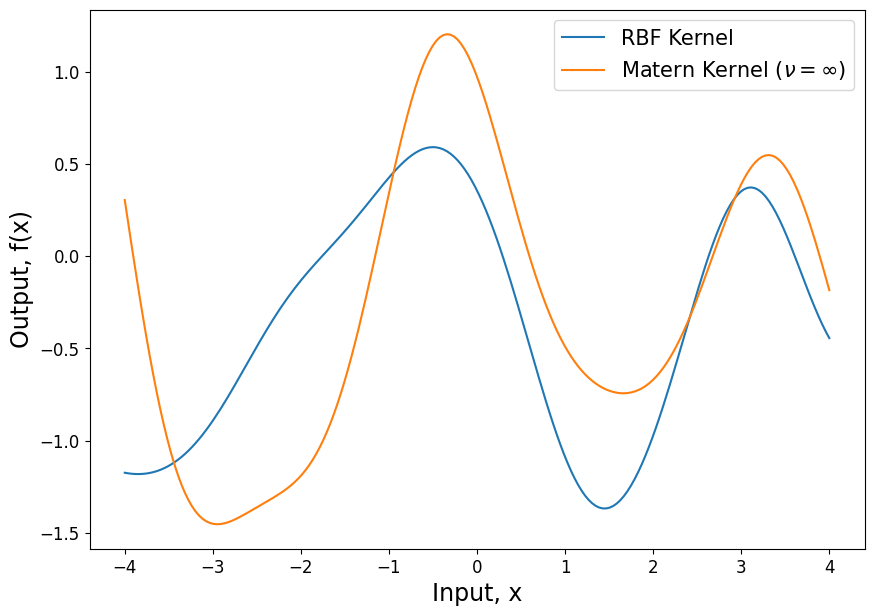

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, Matern
from scipy.stats import multivariate_normal

# Define the input range
x = np.linspace(-4, 4, 200)
X = x[:, np.newaxis]

# Compute the covariance matrices for RBF and Matern (nu=inf) kernels
rbf_kernel = RBF(length_scale=1.0)
matern_inf_kernel = Matern(length_scale=1.0, nu=np.inf)

K_rbf = rbf_kernel(X, X)
K_matern_inf = matern_inf_kernel(X, X)

# Sample one function from each Gaussian process
np.random.seed(42)
f_rbf = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_rbf)
f_matern_inf = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_matern_inf)

# Plot one sample function for each kernel
plt.figure(figsize=(10, 7))
plt.plot(x, f_rbf, label='RBF Kernel')
plt.plot(x, f_matern_inf, label=r'Matern Kernel ($\nu=\infty$)')
plt.xlabel('Input, x', fontsize=17)
plt.ylabel('Output, f(x)', fontsize=17)
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Sample Functions from RBF and Matern (ν=∞) Kernels')

plt.show()
